In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import NHP
from pykalman import KalmanFilter
from sklearn.metrics import r2_score
from utils import apply_kalman_filter, apply_linear_decoder

%matplotlib inline

In [2]:
data_paths = np.sort(os.listdir('/storage/data/nhp')).tolist()

In [307]:
data_path = data_paths[32]
print(data_path)

indy_20170127_03.mat


In [308]:
nhp = NHP(data_path='/storage/data/nhp/' + data_path)

In [309]:
dt = 0.10

In [310]:
positions = nhp.get_binned_positions(bin_width=dt)

x = positions[:, 0]
y = positions[:, 1]

In [311]:
Y = nhp.get_response_matrix(bin_width=dt, region='M1', transform='square_root')
Y = Y[:, np.argwhere(np.sum(Y, axis=0) > 0).ravel()]
print(Y.shape)

(7336, 177)


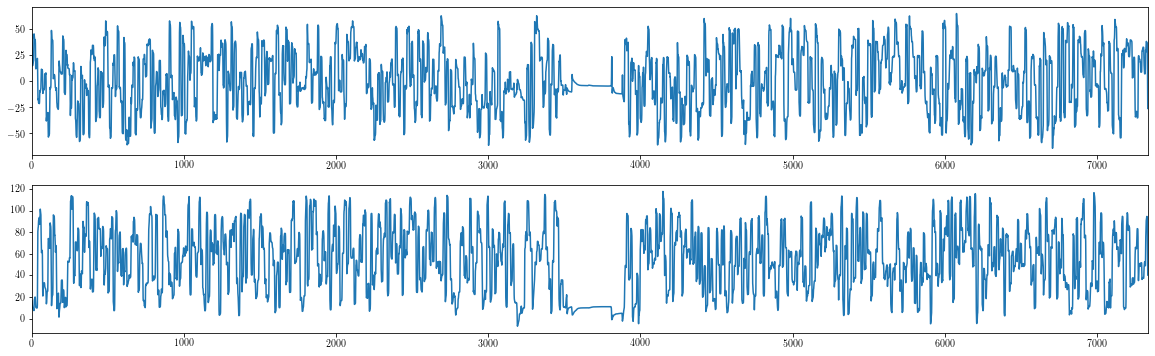

In [312]:
fig, axes = plt.subplots(2, 1, figsize=(20, 6))
axes[0].plot(x)
axes[1].plot(y)

for ax in axes:
    ax.set_xlim([0, x.size])
    # ax.set_xlim(left=200)

In [103]:
Y.shape

(2077, 203)

In [96]:
x[:20]

array([-18.58212389,  23.96749608,  44.0089436 ,  45.92869418,
        38.8090871 ,  36.43128406,  32.5285068 ,  45.8710736 ,
        57.98296223,  45.33308567,  44.0253507 ,  40.74889812,
        31.57062349,  55.53872124,  55.46204874,  53.1838762 ,
        46.77874172,  -8.81235089, -43.48887412, -39.20721026])

In [8]:
X_test, X_test_hat = apply_kalman_filter(x, y, Y, dt, train_frac=0.8)

In [9]:
r2_score(X_test[:, 0], X_test_hat[:, 0])

0.6104269868224756

In [10]:
r2_score(X_test[:, 1], X_test_hat[:, 1])

0.8173766618950025

In [13]:
X1_test, X1_test_hat = apply_linear_decoder(x, y, Y, train_frac=0.8)

In [17]:
np.corrcoef(X1_test[:, 0], X1_test_hat[:, 0])

array([[1.        , 0.62700951],
       [0.62700951, 1.        ]])

In [57]:
np.corrcoef(X_test[:, 1], X_test_hat[:, 1])[0, 1]

0.9069858882757293

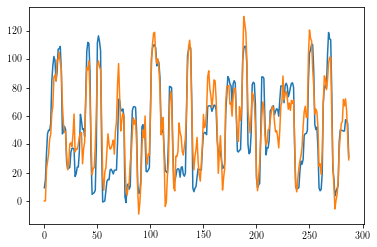

In [18]:
plt.plot(X_test[:, 1])
plt.plot(X_test_hat[:, 1])

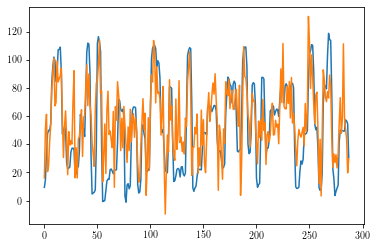

In [19]:
plt.plot(X1_test[:, 1])
plt.plot(X1_test_hat[:, 1])